# Predicción de sobrepeso con una neurona

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria.

In [217]:
import numpy as np
import matplotlib.pyplot as plt

Paso 2. En la siguiente cassilla de código, pega toda la clase del Perceptron.

In [218]:
class Perceptron:

  def __init__(self, n_inputs, learning_rate):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    _, p = X.shape
    y_est = np.zeros(p)
    for i in range(p):
      y_est[i] = np.dot(self.w, X[:,i])+self.b
      if y_est[i] >= 0:
        y_est[i]=1
      else:
        y_est[i]=0
    return y_est

  def fit(self, X, Y, epochs=50):
    _, p = X.shape
    for _ in range(epochs):
      for i in range(p):
        # Escribe las ecuaciones del perceptrón
        y_est = self.predict(X[:, i].reshape((-1, 1)))
        self.w += self.eta * (Y[i] - y_est) * X[:, i] 
        self.b += self.eta * (Y[i] - y_est)

Paso 3. Instancía la siguiente función para poder dibujar la línea que representa el Perceptrón.

In [219]:
# Función para dibujar superficie de desición
def draw_2d_percep(model, xmin, xmax):
  w1, w2, b = model.w[0], model.w[1], model.b 
  plt.plot([xmin, xmax],[(1/w2)*(-w1*xmin-b),(1/w2)*(-w1*xmax-b)],'--k')

Paso 4. Completa el siguiente codigo para generar datos de personas con y sin sobrepeso. Considera a personas con un peso mínimo de 40Kg y un peso máximo de 120, de igual manera, una altura mínima de 1 metro y una máxima de 2.2 metros.

In [220]:
p = 100

# Crear datos
X = np.zeros((2,p))
Y = np.zeros(p)
for i in range(p):
  # masa aleatoria
  X[0,i] = 40 + 80 * np.random.rand()   # En kg

  # estatura aleatoria
  X[1,i] = 1 + 1.2 * np.random.rand()   # En metros
  
  imc = X[0,i] / X[1,i]**2

  if imc >= 25:
    Y[i]=1
  else:
    Y[i]=0

Paso 5. Entrena el modelo y dibuja los resultados

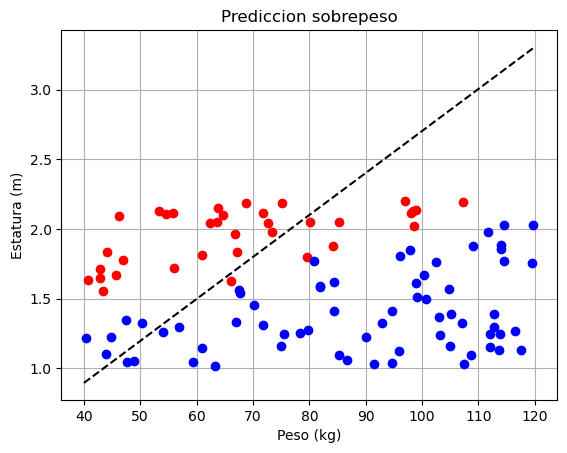

In [221]:
# Crear y entrenar modelo
model = Perceptron(2, 0.1)
model.fit(X, Y, epochs=20)

# Dibujar resultados
plt.figure()
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Prediccion sobrepeso')
plt.grid('on')
plt.xlabel(r'Peso (kg)')
plt.ylabel(r'Estatura (m)')

draw_2d_percep(model, 40, 120)

Paso 6. Repite el paso anterior pero ahora normaliza los datos

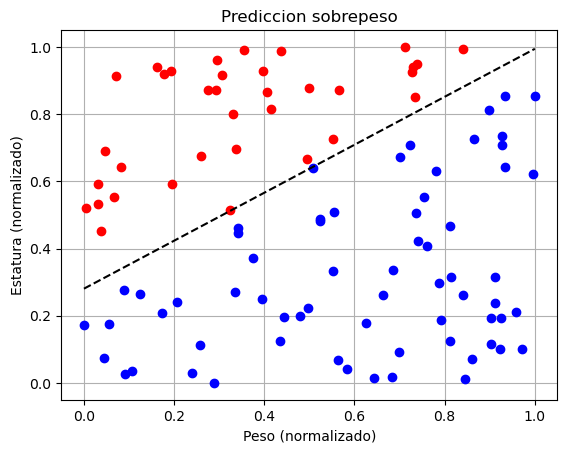

In [222]:
# Normalizat datos
X[0,:] = (X[0, :] - np.min(X[0, :])) / (np.max(X[0, :]) - np.min(X[0, :]))
X[1,:] = (X[1, :] - np.min(X[1, :])) / (np.max(X[1, :]) - np.min(X[1, :]))

# Crear y entrenar modelo
model = Perceptron(2, 0.1)
model.fit(X, Y, epochs=20)

# Dibujar resultados
plt.figure()
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Prediccion sobrepeso')
plt.grid('on')
plt.xlabel(r'Peso (normalizado)')
plt.ylabel(r'Estatura (normalizado)')

draw_2d_percep(model, 0, 1)